1. 생쥐의 출생체중 자료분석에서 모형1과 모형3을 제한최대우도 검정법으로 비교하고자 한다. 다음 물음에 답하시오.

모형1과 모형3에 대해 이해하려면 생쥐의 출생체중 자료를 treatment에 따라 나누어 분석한다는 것을 먼저 알아야 한다.  
treatment의 값은 Control, High, Low 로 나누어진다.

각각의 treatment 그룹의 오차분산에 대한 가정에 따라 모형1, 모형2, 모형3이 나누어진다.

In [14]:
library(Hmisc)
library(nlme)

ratpup = read.table("rat_pup.dat", header=TRUE)

In [15]:
g <- function(x) {c(N=length(x),
                    MEAN=mean(x, na.rm=TRUE),
                    MEDIAN=median(x, na.rm=TRUE),
                    MIN=min(x, na.rm=TRUE),
                    Q=quantile(x, probs=c(0.25, 0.75), na.rm=TRUE),
                    MAX=max(x, na.rm=TRUE),
                    SD=sd(x, na.rm=TRUE), options(digits=3))}

summarize(weight, by=llist(treatment, sex), g)

,treatment,sex,weight,MEAN,MEDIAN,MIN,Q.25.,Q.75.,MAX,SD,digits
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,Control,Female,54,6.12,6.18,3.68,5.82,6.45,7.57,0.685,3
2,Control,Male,77,6.47,6.41,4.57,6.06,6.94,8.33,0.754,3
3,High,Female,32,5.85,5.76,4.48,5.41,6.24,7.68,0.600,3
4,High,Male,33,5.92,5.69,5.01,5.36,6.29,7.70,0.691,3
5,Low,Female,65,5.84,5.84,4.75,5.60,6.11,7.73,0.450,3
6,Low,Male,61,6.03,6.00,5.25,5.75,6.24,7.13,0.380,3


① 모형1과 모형3을 기술하시오.

- 모형1과 모형3은 같은 변량절편모형에 기반한 모형이다.  
$Y_{ij}=\beta_0+\beta_1\times Tr1_j+\beta_2\times Tr2_j+\beta_3\times Sexf_{ij}+\beta_4\times Litsize_j+\beta_5\times Tr1_j\times Sexf_{ij}+\beta_6\times Tr2_j\times Sexf_{ij}+\mu_j+\epsilon_{ij}$  
여기서 $\mu_j\sim^{iid} N(0, \sigma_{litter}^2), \epsilon \sim ^{서로독립}정규분포$  
$Cov(\mu_j, \epsilon_{ij})=0$
- 모형1은 treatment 그룹과 관계없이 모두 동일한 오차분산을 가진다고 가정하는 모형이다.  
$\epsilon_{ij}\sim^{iid}N(0,\sigma^2)$
- 모형3은 treatment 그룹중 (High+Low)군과 Control 군의 오차분산을 다르다고 가정하는 모형이다.  
High/Low: $\epsilon_{ij}\sim^{iid}N(0,\sigma_{h/l}^2)$  
Control: $\epsilon_{ij}\sim^{iid}N(0,\sigma_{c}^2)$

② 모형1과 모형3을 비교하는 가설과 제한가능도비 검정통계량을 기술하고, 검정통계량의 분포를 제시하시오.

- 모형1과 모형3을 비교하는 가설은 다음과 같다.
  - 귀무가설(H0): 모형1이 모형3보다 더 적합하다.
    - 즉, treatment 그룹에 관계없이 모든 그룹에서 동일한 오차분산을 가진다는 가정이 참이다.
    - $H_0: \sigma_{h/l}^2=\sigma_{c}^2$
  - 대립가설(H1): 모형3이 모형1보다 더 적합하다.
    - 즉, High/Low 그룹과 Control 그룹의 오차분산이 다르다는 가정이 참이다.
    - $H_1: \sigma_{h/l}^2\neq\sigma_{c}^2$

- 제한가능도비 검정토계량은 두 모형의 최대가능도 추정값을 이용하여 계산한다.  
  - $G^2 = -2[log L(\theta_0)-log L(\theta_1)$
  - 검정통계량 $G^2$는 카이제곱 분포를 따르며, 자유도는 두 모형 간의 자유도의 차이(여기서는 1)로 결정된다.

③ 제한가능도비 검정통계량의 관측값을 제시하고, 유의확률을 구하고 유의수준 5%에서 검정결과를 기술하시오.

In [ ]:
# 모형1
ratpup$sex1[sex=="Female"] <- 1
ratpup$sex1[sex=="Male"] <- 0

model1 = lme(weight ~ treatment + sex1 + litsize + treatment*sex1, random = ~1 | litter, data=ratpup, method="REML")

# 모형3
ratpup$trtgrp[treatment=="Control"] <- 1
ratpup$trtgrp[treatment=="Low" | treatment=="High"] <- 2

model3 = lme(weight ~ treatment + sex1 + litsize + treatment*sex1, random = ~1 | litter, data=ratpup, method="REML", weights=varIdent(form = ~1 | trtgrp))

# 제한가능도비 검정통계량 값 구하기
anova(model1, model3)

# 검정통계량 값으로 p값 구하기
pvalue = 1-pchisq(40,1)
pvalue

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
model1,"lme.formula(fixed = weight ~ treatment + sex1 + litsize + treatment * sex1, data = ratpup, random = ~1 | litter, method = ""REML"")",1,9,419,453,-201,,NA,NA
model3,"lme.formula(fixed = weight ~ treatment + sex1 + litsize + treatment * sex1, data = ratpup, random = ~1 | litter, weights = varIdent(form = ~1 | trtgrp), method = ""REML"")",2,10,381,419,-181,1 vs 2,40,2.51e-10


[1] 2.54e-10

- 검정통계량 관측값은 40이고, 유의 확률은 2.54e-10 이다.
- 유의수준 5%에서 귀무가설을 기각한다.
- 즉, treatment 그룹 High/Low 와 Control 그룹의 오차분산을 다르게 가정하는 것이 타당하다.

2. Model 3.1 에 대하여 다음 물음에 답하시오.

① Model 3.1 을 기술하시오.

- 모형3을 ANONA 분석한 결과 treatment:sex1의 교로작용은 유의하지 않기 때문에 제거한 모형이다.
- 축소된 모형은 다음과 같다.  
$E(Y_{ij})=\beta_0+\beta_1\times Tr1_j +\beta_2\times Tr2_j + \beta_3\times Sexf_{ij}+\beta_4\times Litsize_j$

② treatment (용량군)의 유의성을 Type III F-검정을 사용하여 검정하시오. 이 때 귀무가설과 대립가설은 무엇인가?

In [25]:
model3.1 = lme(weight ~ sex1 + litsize + treatment, random = ~1 | litter, ratpup, method="REML", weights=varIdent(form=~1|trtgrp))

anova(model3.1)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,294,9029.1,0.00e+00
sex1,1,294,63.6,3.42e-14
litsize,1,23,33.7,6.54e-06
treatment,2,23,11.4,3.65e-04


treatment 용량군의 p값이 3.65e-04로 매우 작은 값이다. 즉, 귀무가설을 기각한다.  
귀무가설과 대립가설은 다음과 같다.

- 귀무가설(H0): treatment 값이 생쥐의 출생체중에 영향을 미치지 않는다.
  - $Y_{ij}=\beta_0 + \beta_3\times Sexf_{ij}+\beta_4\times Litsize_j + \mu_j + \epsilon_{ij}$

- 대립가설(H1): treatment 값이 생쥐의 출생체중에 영향을 미친다.
  - $Y_{ij}=\beta_0 + \beta_1\times Tr1_j +\beta_2\times Tr2_j + \beta_3\times Sexf_{ij}+\beta_4\times Litsize_j + \mu_j + \epsilon_{ij}$

③ sex(성)의 유의성을 Type III F-검정을 사용하여 검정하시오. 이 때 귀무가설과 대립가설은 무엇인가?

In [26]:
model3.1 = lme(weight ~ treatment + litsize + sex1, random = ~1 | litter, ratpup, method="REML", weights=varIdent(form=~1|trtgrp))

anova(model3.1)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,294,9029.09,0.00e+00
treatment,2,23,4.24,2.71e-02
litsize,1,23,44.83,7.88e-07
sex1,1,294,66.72,9.33e-15


sex (성)의 p값이 9.33e-15로 매우 작은 값이다. 즉, 귀무가설을 기각한다.  
귀무가설과 대립가설은 다음과 같다.

- 귀무가설(H0): sex 값이 생쥐의 출생체중에 영향을 미치지 않는다.
  - $Y_{ij}=\beta_0 + \beta_1\times Tr1_j +\beta_2\times Tr2_j + \beta_4\times Litsize_j + \mu_j + \epsilon_{ij}$

- 대립가설(H1): sex 값이 생쥐의 출생체중에 영향을 미친다.
  - $Y_{ij}=\beta_0 + \beta_1\times Tr1_j +\beta_2\times Tr2_j + \beta_3\times Sexf_{ij}+\beta_4\times Litsize_j + \mu_j + \epsilon_{ij}$

3. 다음 기술이 타당하면 O, 틀리면 X로 표시하시오.

① 고정효과 모수의 유의성검정을 가능도비 검정법으로 할 때 제한가능도함수를 사용한다.
 → O

② 변량절편모형에서 급내상관계수는 0과 1 사이의 값을 가진다. → O

③ 급내상관계수의 값이 클수록 급내 이질성은 증가한다. → O

④ 변량효과 $u_j$의 최량선형불편예측량(BLUP)은 $u_j$를 고정효과로 가정하고 추정한 값보다 작게 추정하는 경향이 있다. → X

⑤ 변량효과 모형의 오차분포에 대한 진단에는 조건부 잔차보다 주변부 잔차를 사용하는 것이 합리적이다. → O

4. R package에서 제공하는 Pearson-type 조건부 잔차를 사용하여 오차분포 가정에 대한 잔차진단을 실시하고 결과를 해석하시오.

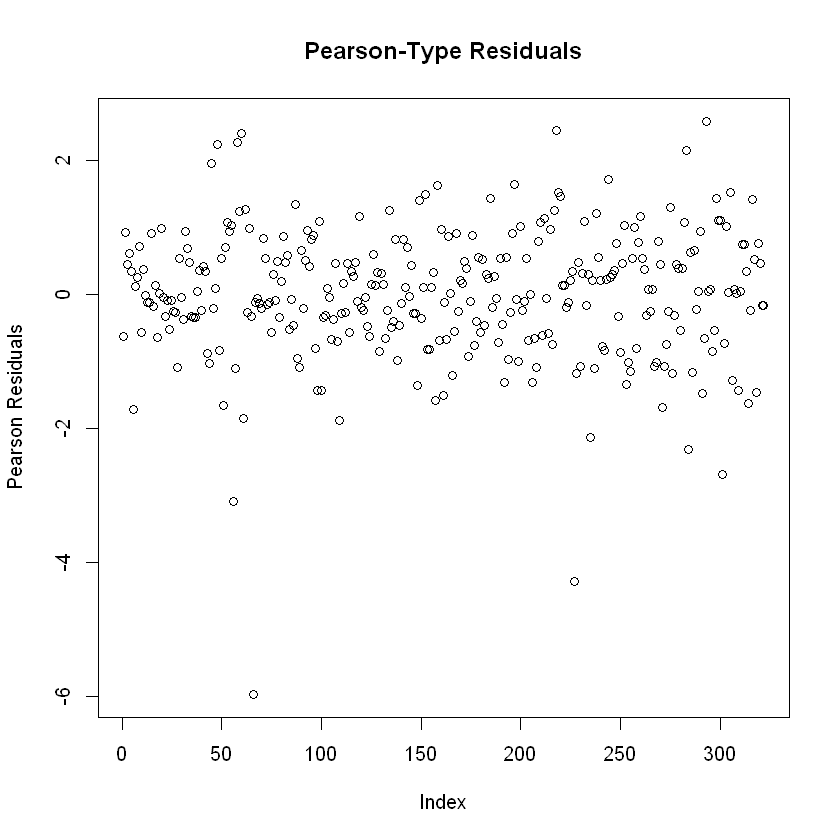

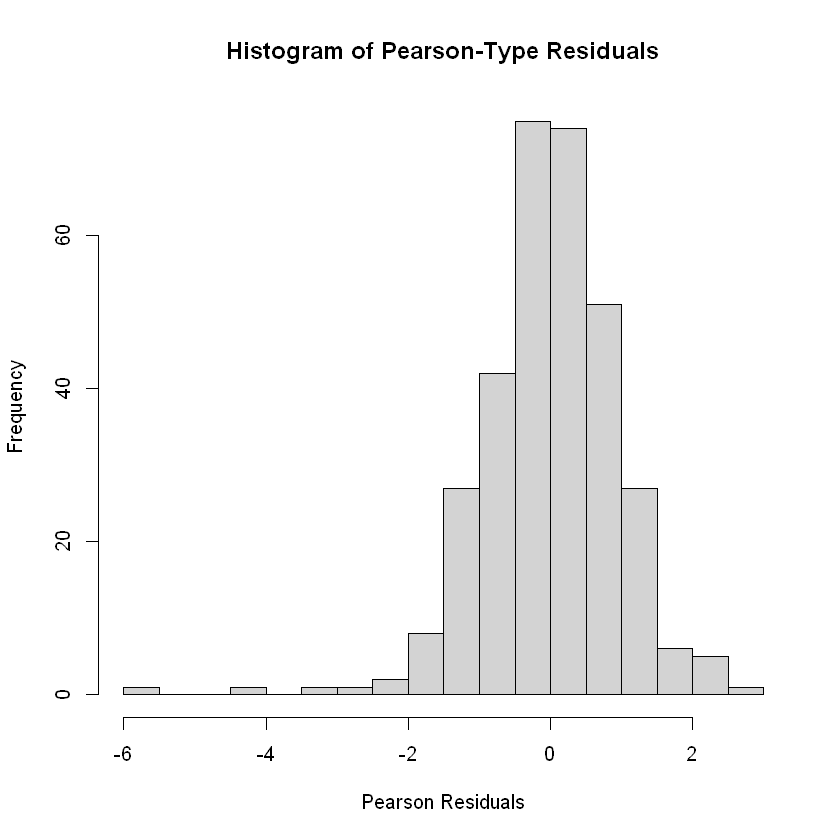

In [28]:
# 피어슨 잔차 추출
pearson_resid = residuals(model3.1, type="pearson")

# 잔차 플롯
plot(pearson_resid, main = "Pearson-Type Residuals", ylab = "Pearson Residuals", xlab = "Index")

# 히스토그램 및 정규성 검사
hist(pearson_resid, main = "Histogram of Pearson-Type Residuals", xlab = "Pearson Residuals", breaks = 20)


- 잔차플롯
  - 잔차가 일정한 패턴없이 무작위로 분포하는 것으로 보인다.
  - 즉, 모델이 적합한 것으로 해석할 수 있다.
- 히스토그램
  - 잔차의 분포가 정규분포와 유사한 것으로 보인다.
  - 즉, 오차분포가 정규성을 따른다고 해석할 수 있다.


	Shapiro-Wilk normality test

data:  pearson_resid
W = 0.9, p-value = 2e-09


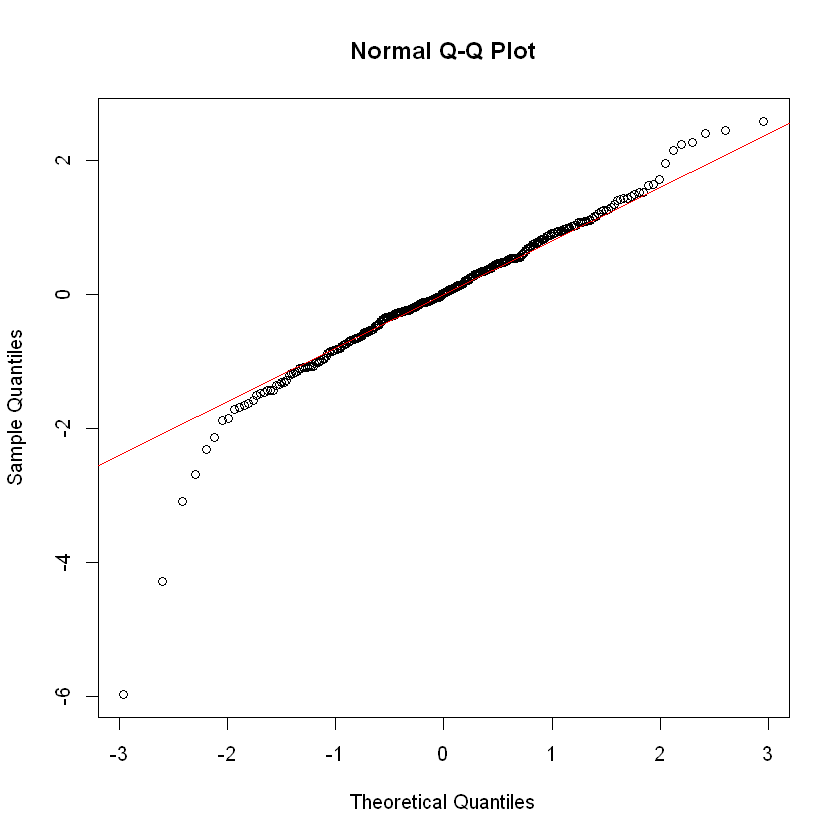

In [36]:
# Q-Q plot (정규성 확인)
qqnorm(pearson_resid)
qqline(pearson_resid, col = "red")

# Shapiro-Wilk test (정규성 테스트)
shapiro.test(pearson_resid)


- Q-Q 플롯에서 직선을 벗어나는 점들이 존재하는 것으로 보아 일부 값들이 정규분포를 따르지 않는 것으로 보인다.
- 샤피로-윌크스 테스트에 따르면 p-value가 0.05보다 작기 때문에 정규분포를 따르지 않는 것으로 보인다.

- 결과 해석
  - Q-Q 플롯은 모든 데이터가 완전히 정규분포를 따르지 않는다면 직선에서 벗어나는 점들이 생기게 된다.
  - 샤피로-윌크스 테스트는 통계적으로 데이터가 정규분포를 따르는지 여부를 검정하는 방법인데, 이 방법은 샘플의 크기와 잔차의 분포에 매우 민감하기 때문에 샘플이 커질수록 작은 편차도 통계적으로 유의미하게 나타날 수 있습니다.
  - 즉, 잔차의 분포가 약간만 정규분포에서 벗어나면 검정에서 "정규분포를 따르지 않는다"고 판단할 수 있습니다.
  - 이에 비해 잔차플롯과 히스토그램은 시각적으로 오차분포가 정규분포에 가까운지 확인하는데 유용하지만, 보다 완화된 기준을 적용한다고 볼 수 있습니다.
- 즉, model3.1의 경우 잔차의 정규성이 어느 정도 인정되는 수준이라고 볼 수 있습니다.